<a href="https://colab.research.google.com/github/keijiyo/Study_AI_recipe_book/blob/main/AI_Recipe_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1　プロセスの一般論

In [ ]:
# Part 1

## Introduction
一般的なプロセスの紹介

|プリアナリティクス|データマスター作成|基礎集計、可視化|モデリング|評価|
|:-|:-|:-|:-|:-|
|・要件ヒアリング<br>・期待値コントロール<br>・成果物設定<br>・分析方向性立案<br>・データ連携方法確認<br>・データ受領・確認|・マスターデータ作成<br>・データの集約<br>・データの前処理|・単純集計<br>・クロス集計<br>・相関分析|・モデリング|・評価用データでの評価<br>・シミュレーション|
|・提案書<br>　- スケジュール<br>　- 予算<br>　- 体制<br>　- 成果物<br>・データ連携図<br>・データ一覧|・データ作成手順書<br>・マスターデータ|・集計表<br>・散布図などの図表|・モデル|・評価結果<br>　- AR値<br>　- AUC値<br>　- 正解率<br>　- F値<br>・シミュレーション結果<br>・最終報告書|


##レシピ1.1　プリアナリティクス

##分析方向性立案

- ECサイト改善の例

|分析方向性立案のステップ|アウトプット|備考|
|:--|:--|:--|
|1. KGIの設定|課題策定より、売上/年間を設定|ステークホルダーとすり合わせ|
|2. KPIに分解|ツリー上に頂点のKGIに対してKPIで分解するイメージ|抜けもれなく分解|
|3. コントロール可能変数の特定|訪問ユーザーのうち、特に新規ユーザー数が減少傾向|例えば、投下広告費用、Webの接触コンテンツ数|
|4. 仮説立案|①検索語訪問率が低い<br>②（自社ECの）認知率が低い|分解したKPIに対してボトルネック個所を探す<br>それに対する仮説（課題）群を見つける|
|5. 分析方向性立案と評価|何のために、どのような分析を行うか|ボトルネックKPIがコントロール可能変数と対応あり。→施策対象として検討|
<br>
  
- 評価と優先順位の検討  
ボトルネック→仮説→施策のための分析→評価  
インパクトと実現可能性の観点で評価し、優先順位を決める  


##レシピ1.2　分析マスターデータ作成

データ集約、結合等して欠損値処理などを実施

##レシピ1.3　基礎集計と可視化

- 説明可能性は大事。
- 本作業は前処理と行き来することもあるのが普通。

##レシピ1.4　モデリング
書籍のPart 2 以降で解説あり。

##レシピ1.5　評価・実装

- 2値予測の評価指標
$$ 正解率 = \frac{TN + TP}{TN + FN  + TP + FP} $$  
$$ 適合率 = \frac{TP}{TP + FP} $$  
$$ 再現率（真陽性率、感度） = \frac{TP}{FN  + TP} $$
$$ 特異度 = \frac{TN}{TN + FP} $$  
$$ 偽陽性率（1 - 特異度） = \frac{FP}{TN + FP} $$  
  - 再現率は偽陰性をなくしたい時に有効。 
  - 特異度は負例に対しての再現率。 
  - AUC  
モデル自体の評価にはROCカーブを使い、AUCが1に近いと優れている。  
　縦軸：真陽性率（再現率、感度）、横軸：偽陽性率（1 - 特異度）  

※参考  
https://bellcurve.jp/statistics/course/14802.html  
  https://blog.kikagaku.co.jp/roc-auc  



ROCカーブを見てみる

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

fpr:  [0.  0.  0.5 0.5 1. ]
tpr:  [0.  0.5 0.5 1.  1. ]
thresholds:  [1.8  0.8  0.4  0.35 0.1 ]


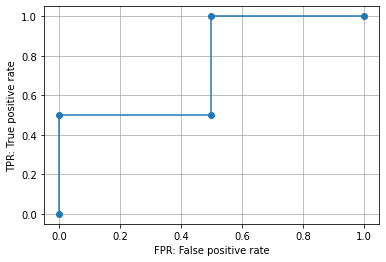

In [11]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
print('fpr: ', fpr)
print('tpr: ', tpr)
print('thresholds: ', thresholds) # 任意に閾値が決定される。thresholds[0]はscoresの最大＋1。

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()